## Lab 8: Regularization and Cross-Validation

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.linear_model as lm
import scipy.io as sio

Today's lab covers:

- How to use regularization to avoid overfitting
- How to use cross-validation to find the amount of regularization that produces a model with the least error for new data

## Dammed Data

We've put our data into two files: `train.csv` and `test.csv` which contain
the training and test data, respectively. You are not allowed to train
on the test data.

The y values in the training data correspond to the amount of water that flows out of the dam on a particular day.  There is only 1 feature: the increase in water level for the dam's reservoir on that day, which we'll call x.

In [1]:
!head train.csv

X,y
-15.93675813378541,2.1343105067296686
-29.152979217238133,1.1732566787564553
36.18954862666253,34.35910918053895
37.49218733199513,36.83795516371235
-48.058829452570066,2.808965074479856
-8.941457938049755,2.121072476666392
15.307792889226079,14.710268306562307
-34.70626581132249,2.614184386432259
1.3891543686358903,3.7401716656949393


Let's load in the data:

In [6]:
data = pd.read_csv('train.csv')
X = data[['X']].values
y = data['y'].values
X.shape, y.shape

((33, 1), (33,))

Text(0, 0.5, 'Water flow out of dam (y)')

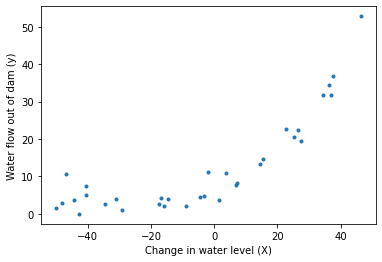

In [7]:
_ = plt.plot(X[:, 0], y, '.')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water flow out of dam (y)')

In [8]:
def plot_data_and_curve(curve_x, curve_y):
    plt.plot(X[:, 0], y, '.')
    plt.plot(curve_x, curve_y, '-')
    plt.ylim(-20, 60)
    plt.xlabel('Change in water level (X)')
    plt.ylabel('Water flow out of dam (y)')

**Question 1:** As a warmup, let's fit a line to this data using `sklearn`.
We've imported [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) as `lm`, so you can use that instead of
typing out the whole module name. Running the cell should show the data
with your best fit line.

In [9]:
linear_clf = ...

# Fit your classifier
linear_clf.fit(X, y)

# Predict a bunch of points to draw best fit line
all_x = np.linspace(-55, 55, 200).reshape(-1, 1)
line = linear_clf.predict(all_x)

plot_data_and_curve(all_x, line)

AttributeError: 'ellipsis' object has no attribute 'fit'

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
linear_clf = lm.LinearRegression()
# Fit your classifier
linear_clf.fit(X, y)

all_x = np.linspace(-55, 55, 200).reshape(-1, 1)
line = linear_clf.predict(all_x)

plot_data_and_curve(all_x, line)
</pre>
</details>

**Question 2:** If you had to guess, which has a larger effect on error for this dataset: bias or variance?
Explain briefly.

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
<b>SOLUTION:</b> Bias. Our data are curved up, but our line cannot model that curve, so bias is high. Variance is low because the complexity of our model is low relative to the size of the training set.  That is, if we drew a new dataset from the population of days, we would probably get a similar line.
</details>

**Question 3:** Let's now add some complexity to our model by adding polynomial features.

Reference the `sklearn` docs on the `PolynomialFeatures` class. You should use this class to add polynomial features to `X` up to degree 8 using the `fit_transform` method.

The final `X_poly` data matrix should have shape `(33, 9)`. Think about and discuss why.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_poly = ...
X_poly.shape

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
X_poly = PolynomialFeatures(degree=8).fit_transform(X)
</pre>
</details>

**Question 4:** Now, fit a linear regression to the data, using polynomial features.

Then, follow the code in Question 1 to make predictions for the values in `all_x`. You'll have to add polynomial features to `all_x` in order to make predictions.

Then, running this cell should plot the best fit curve using a degree 8 polynomial.

In [ ]:
poly_clf = ...

# Fit your classifier
...

# Set curve to your model's predictions on all_x
curve = ...

plot_data_and_curve(all_x, curve)

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
poly_clf = lm.LinearRegression()

poly_clf.fit(X_poly, y)

curve = poly_clf.predict(PolynomialFeatures(degree=8).fit_transform(all_x))

plot_data_and_curve(all_x, curve)
</pre>
</details>

**Question 5:** Think about and discuss what you notice in the model's predictions.

Now, compute the mean squared training error for both the best fit line and polynomial. Again, you'll have to transform the training data for the polynomial regression before you can make predictions.

You should get training errors of around 52.8 and 5.23 for line and polynomial models, respectively. Why does the polynomial model get a lower training error than the linear model?

In [ ]:
def mse(predicted_y, actual_y):
    return np.mean((predicted_y - actual_y) ** 2)

line_training_error = ...
poly_training_error = ...

line_training_error, poly_training_error

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
line_training_error = mse(linear_clf.predict(X), y)
poly_training_error = mse(poly_clf.predict(PolynomialFeatures(degree=8).fit_transform(X)), y)
</pre>
</details>

**Question 6:** It's annoying to have to transform the data every time we want to use polynomial features. We can use a [`Pipeline`](http://scikit-learn.org/stable/modules/pipeline.html#pipeline) to let us do both transformation and regression in one step.

Read the docs for [`make_pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline) and create a pipeline for polynomial regression called `poly_pipeline`. Then, fit it on `X` and `y` and compute the training error as in Question 5. The training errors should match.

In [ ]:
from sklearn.pipeline import make_pipeline

poly_pipeline = ...

# Fit the pipeline on X and y
...

# Compute the training error
pipeline_training_error = ...
pipeline_training_error

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
from sklearn.pipeline import make_pipeline

poly_pipeline = make_pipeline(PolynomialFeatures(degree=8), lm.LinearRegression())

poly_pipeline.fit(X, y)

pipeline_training_error = mse(poly_pipeline.predict(X), y)
pipeline_training_error
</pre>
</details>

Nice! With pipelines, we can combine any number of transformations and treat the whole thing as a single classifier.

**Question 7:** Now, we know that a low training error doesn't necessarily mean your model is good. So, we'll hold out some points from the training data for a *validation set*. We'll use these held-out points to choose the best model.

Use the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split out one third of the training data for validation. Call the resulting datasets `X_train`, `X_valid`, `y_train`, `y_valid`.

`X_train` should have shape `(22, 1)`. `X_valid` should have shape `(11, 1)`

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

...
X_train.shape, X_valid.shape

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33)
X_train.shape, X_valid.shape
</pre>
</details>

**Question 8:** Now, set `X_train_line_error`, `X_valid_line_error`,
`X_train_poly_error`, `X_valid_poly_error` to the training and validation
errors for both linear and polynomial regression.

You'll have to call `.fit` on your classifiers/pipelines again since we're using
`X_train` and `y_train` instead of `X` and `y`.

You should see that the validation error for the polynomial fit is significantly
higher than the linear fit (152.6 vs 115.2).

In [ ]:
# Fit the linear classifier
...

# Fit the polynomial pipeline
...

X_train_line_error = ...
X_valid_line_error = ...

X_train_poly_error = ...
X_valid_poly_error = ...

X_train_line_error, X_valid_line_error, X_train_poly_error, X_valid_poly_error

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
# Fit the linear classifier
linear_clf.fit(X_train, y_train)

poly_pipeline.fit(X_train, y_train)

X_train_line_error = mse(linear_clf.predict(X_train), y_train)
X_valid_line_error = mse(linear_clf.predict(X_valid), y_valid)

X_train_poly_error = mse(poly_pipeline.predict(X_train), y_train)
X_valid_poly_error = mse(poly_pipeline.predict(X_valid), y_valid)

X_train_line_error, X_valid_line_error, X_train_poly_error, X_valid_poly_error
</pre>
</details>

**Question 9:** Our 8 degree polynomial is overfitting our data.
To reduce overfitting, we can use **regularization**.

The usual cost function for linear regression is:

$$J(\theta) = (Y - X \theta)^T (Y - X \theta)$$

Edit the cell below to show the cost function of linear regressions with L2 regularization. Use
$\lambda $ as your regularization parameter.

$$J(\theta) = (Y - X \theta)^T (Y - X \theta)$$

**Now,** explain why this cost function helps reduce overfitting.

*Write your answer here, replacing this text.*

<details><summary><button>Click here to reveal the answer!</button></summary>
    <b>SOLUTION:</b> Adding regularization effectively restricts the set of possible polynomials we're allowed to use to fit the data.  In particular, polynomials with large coefficients, which can be used to fit data very precisely, are discouraged.
</details>

**Question 10:** L2 regularization for linear regression is also known as
*Ridge* regression. Create a pipeline called `ridge_pipeline` that again
creates polynomial features with degree 8 and then uses the `Ridge` sklearn 
classifier.

The `alpha` argument is the same as our $\lambda$. Leave it as the default (1.0). You should set `normalize=True` to normalize your data before fitting. Why do we have to do this?

Then, fit your pipeline on the data. The cell will then plot the curve of your
regularized classifier. You should notice the curve is significantly
smoother.

Then, fiddle around with the alpha value. What do you notice as you
increase alpha? Decrease alpha?

In [ ]:
ridge_pipeline = ...

# Fit your classifier
...

# Set curve to your model's predictions on all_x
ridge_curve = ...

plot_data_and_curve(all_x, ridge_curve)

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
ridge_pipeline = make_pipeline(PolynomialFeatures(degree=8), lm.Ridge(normalize=True, alpha=1.)) #SOLUTION

ridge_pipeline.fit(X_train, y_train)

ridge_curve = ridge_pipeline.predict(all_x)

plot_data_and_curve(all_x, ridge_curve)
</pre>
</details>

**Question 11:** Compute the training and validation error for the `ridge_pipeline`.

How do the errors compare to the errors for the unregularized model? Why did each one go up/down?

In [ ]:
ridge_train_error = ...
ridge_valid_error = ...

ridge_train_error, ridge_valid_error

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
ridge_train_error = mse(ridge_pipeline.predict(X_train), y_train) 
ridge_valid_error = mse(ridge_pipeline.predict(X_valid), y_valid)
</pre>
</details>

**Question 12:** Now we want to know: how do we choose the best alpha value?

This is where we use our validation set. We can try out a bunch of alphas and pick the one that gives us the least error on the validation set. Why can't we use the one that gives us the least error on the training set? The test set?

For each alpha in the given `alphas` list, fit a Ridge regression model to the training set and check its accuracy on the validation set.

Finally, set `best_alpha` to the best value. You should get a best alpha of 0.01 with a validation error of 15.7.

In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0]

# Your code to find the best alpha
...

best_alpha

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 10.0]

def compute_error(alpha):
    pline = make_pipeline(PolynomialFeatures(degree=8),
                          lm.Ridge(normalize=True, alpha=alpha))
    pline.fit(X_train, y_train)
    return mse(pline.predict(X_valid), y_valid)

errors = [compute_error(alpha) for alpha in alphas]
best_alpha_idx = np.argmin(errors)
best_alpha, best_error = alphas[best_alpha_idx], errors[best_alpha_idx]

best_alpha, best_error
</pre>
</details>

**Question 13:** Now, set `best_pipeline` to the pipeline with the degree 8 polynomial transform and the ridge regression model with the best value of alpha.

In [ ]:
best_pipeline = ...

best_pipeline.fit(X_train, y_train)

best_curve = best_pipeline.predict(all_x)

plot_data_and_curve(all_x, best_curve)

<details><summary><button>Click here to reveal the answer!</button></summary>
<pre>
best_pipeline = make_pipeline(PolynomialFeatures(degree=8), lm.Ridge(normalize=True, alpha=best_alpha))
</pre>
</details>

Now, run the cell below to find the test error of your simple linear model, your polynomial model, and your regularized polynomial model.

In [ ]:
test_data = pd.read_csv('test.csv')
X_test = data[['X']].as_matrix()
y_test = data['y'].as_matrix()

line_test_error = mse(linear_clf.predict(X_test), y_test)
poly_test_error = mse(poly_pipeline.predict(X_test), y_test)
best_test_error = mse(best_pipeline.predict(X_test), y_test)

line_test_error, poly_test_error, best_test_error

Nice! You've use regularization and cross-validation to fit an accurate polynomial model to the dataset.

In the future, you'd probably want to use something like [`RidgeCV`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) to automatically perform cross-validation, but it's instructive to do it yourself at least once.

# Acknowledgement

This lab has been taken from the [Data 100 course at UC Berkeley](http://www.ds100.org/).